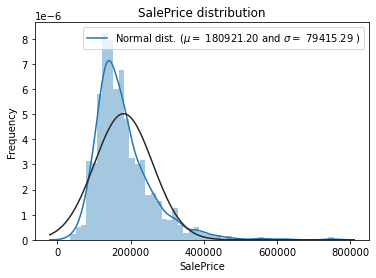

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm, skew
#check train null data
dirname=os.getcwd()
data_dir=os.path.join(dirname,"house-prices-advanced-regression-techniques")
train_path = os.path.join(data_dir,"train.csv")
test_path = os.path.join(data_dir,"test.csv")
x_train = pd.read_csv(str(train_path))
x_test = pd.read_csv(str(test_path))

plt.figure()
sns.distplot(x_train['SalePrice'].dropna() , fit=norm)
(mu, sigma) = norm.fit(x_train['SalePrice'].dropna())     
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

y_train = x_train.pop('SalePrice')
y_train = pd.DataFrame(y_train)
x_train.drop('Id', axis = 1, inplace = True)
x_test.drop('Id', axis = 1, inplace = True)
all_data = pd.concat((x_train,x_test)).reset_index(drop=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'PoolQC'),
  Text(1, 0, 'MiscFeature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'FireplaceQu'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'GarageFinish'),
  Text(7, 0, 'GarageYrBlt'),
  Text(8, 0, 'GarageQual'),
  Text(9, 0, 'GarageCond'),
  Text(10, 0, 'GarageType'),
  Text(11, 0, 'BsmtExposure'),
  Text(12, 0, 'BsmtCond'),
  Text(13, 0, 'BsmtQual'),
  Text(14, 0, 'BsmtFinType2'),
  Text(15, 0, 'BsmtFinType1'),
  Text(16, 0, 'MasVnrType'),
  Text(17, 0, 'MasVnrArea'),
  Text(18, 0, 'MSZoning'),
  Text(19, 0, 'BsmtFullBath'),
  Text(20, 0, 'BsmtHalfBath'),
  Text(21, 0, 'Utilities'),
  Text(22, 0, 'Functional'),
  Text(23, 0, 'Exterior2nd'),
  Text(24, 0, 'Exterior1st'),
  Text(25, 0, 'SaleType'),
  Text(26, 0, 'BsmtFinSF1'),
  Text(27, 0, 'BsmtFinSF2'),
  Text(28, 0, 'BsmtUnfSF'),
  Text(29, 0, 'Electr

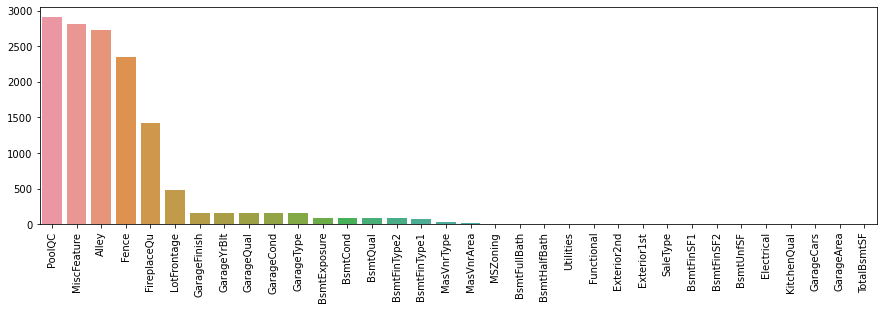

In [24]:
col_null_info = all_data.isnull().sum(); 
col_null_info = col_null_info[col_null_info>0].sort_values(ascending=False)
plt.figure(figsize=(15,4))
sns.barplot(x=col_null_info.index, y=col_null_info.values)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'PoolQC'),
  Text(1, 0, 'MiscFeature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'FireplaceQu'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'GarageYrBlt'),
  Text(7, 0, 'GarageType'),
  Text(8, 0, 'GarageFinish'),
  Text(9, 0, 'GarageQual'),
  Text(10, 0, 'GarageCond'),
  Text(11, 0, 'BsmtFinType2'),
  Text(12, 0, 'BsmtExposure'),
  Text(13, 0, 'BsmtFinType1'),
  Text(14, 0, 'BsmtCond'),
  Text(15, 0, 'BsmtQual'),
  Text(16, 0, 'MasVnrArea'),
  Text(17, 0, 'MasVnrType'),
  Text(18, 0, 'Electrical')])

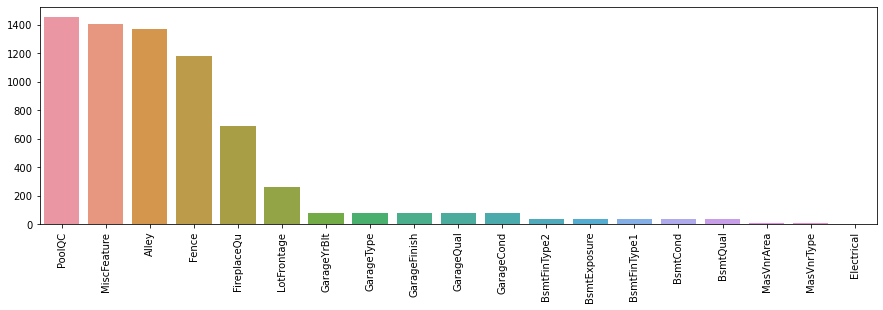

In [25]:
col_null_info = x_train.isnull().sum(); 
col_null_info = col_null_info[col_null_info>0].sort_values(ascending=False)
plt.figure(figsize=(15,4))
sns.barplot(x=col_null_info.index, y=col_null_info.values)
plt.xticks(rotation=90)

<AxesSubplot:>

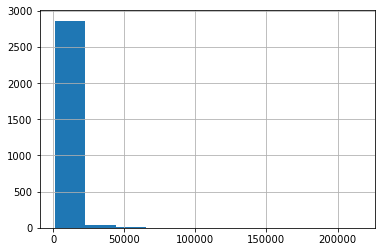

In [27]:
#Here use for showing the distribution of the data
all_data['LotArea'].hist()

<AxesSubplot:>

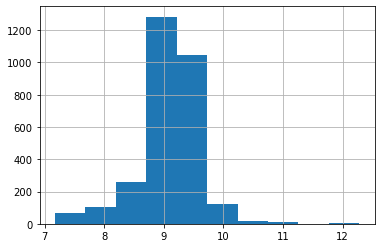

In [28]:
all_data['LotArea'].apply(np.log1p).hist()

<AxesSubplot:>

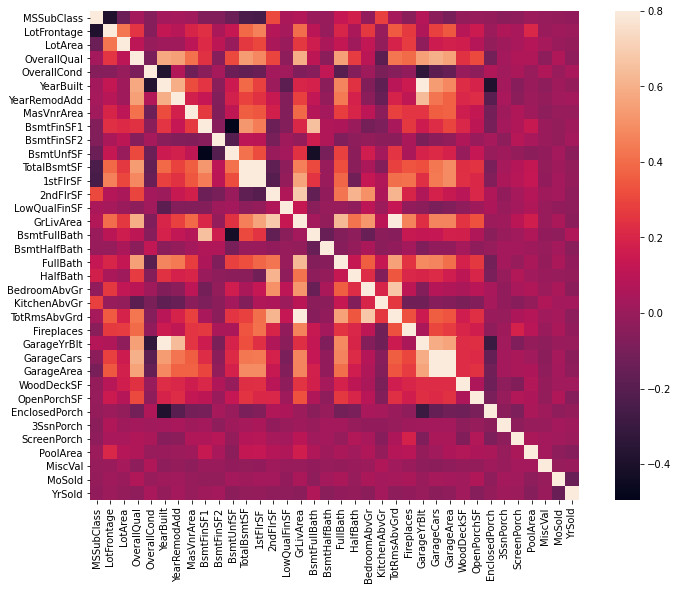

In [29]:
corrmat = x_train.corr()
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(corrmat, vmax=.8, square=True)